In [1]:
# Load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Load the medical dataset
medical = pd.read_csv('medical_clean.csv')

In [2]:
# Check for duplicates in the dataset
print(medical.duplicated().value_counts())

# Identify missing values in each column
missing_values = medical.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)

False    10000
Name: count, dtype: int64
Missing Values in Each Column:
CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services        

In [3]:
# Define a function to count outliers using IQR
def count_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = (series < lower_bound) | (series > upper_bound)
    return outliers.sum()

# Select numeric columns for outlier detection
numeric_columns = medical.select_dtypes(include=['float64', 'int64'])

# Count outliers for each numeric column
count_outliers = numeric_columns.apply(count_outliers)

# Display the count of outliers
print(count_outliers)

CaseOrder               0
Zip                     0
Lat                   150
Lng                   237
Population            855
Children              411
Age                     0
Income                326
VitD_levels            60
Doc_visits              0
Full_meals_eaten        8
vitD_supp              70
Initial_days            0
TotalCharge             0
Additional_charges    424
Item1                 449
Item2                 429
Item3                 443
Item4                 450
Item5                 443
Item6                 443
Item7                 438
Item8                 442
dtype: int64



Column: Lat
Lower Whisker: 25.07153749999999
Upper Whisker: 52.22775750000001
Count of Outliers: 150


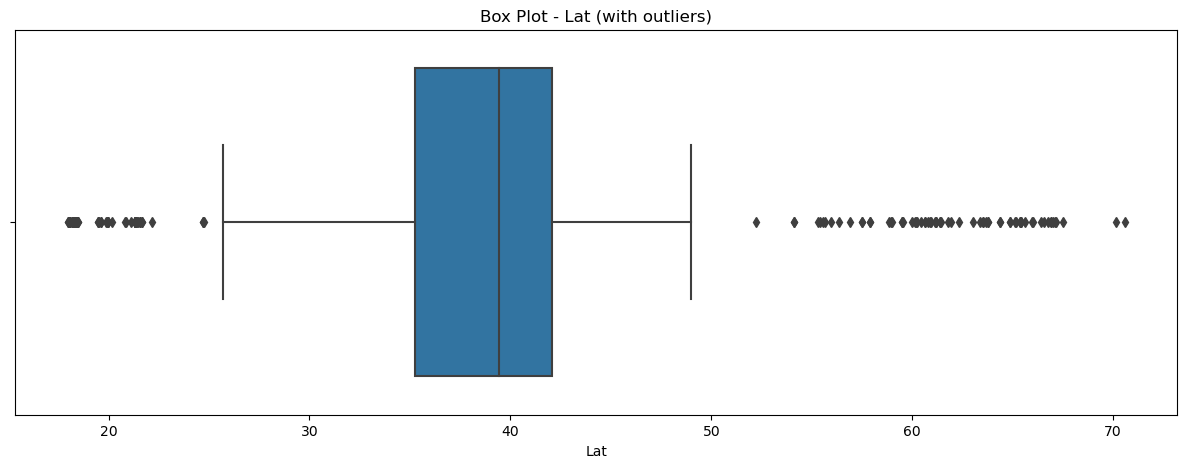


Column: Lng
Lower Whisker: -122.72538124999998
Upper Whisker: -55.065651250000016
Count of Outliers: 237


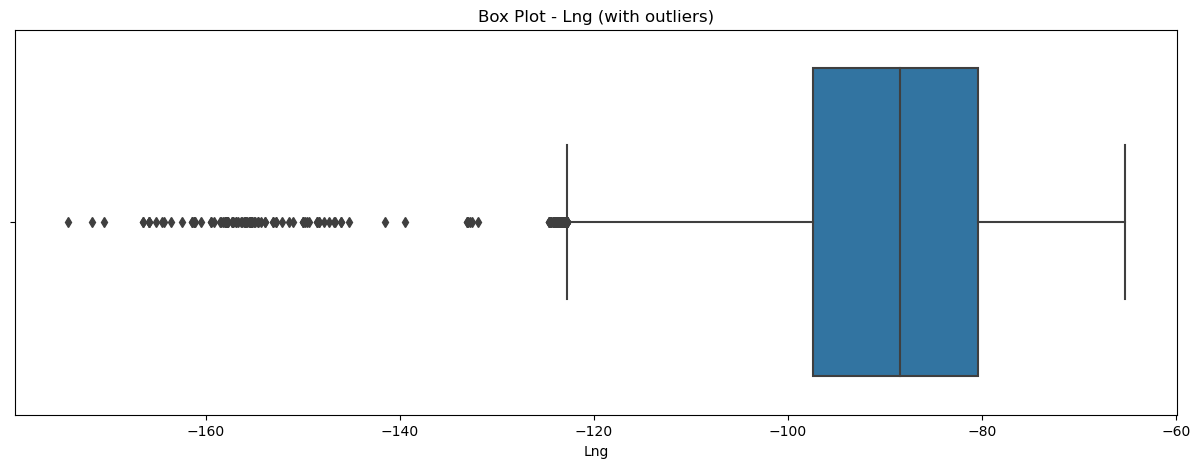


Column: Population
Lower Whisker: -19180.625
Upper Whisker: 33820.375
Count of Outliers: 855


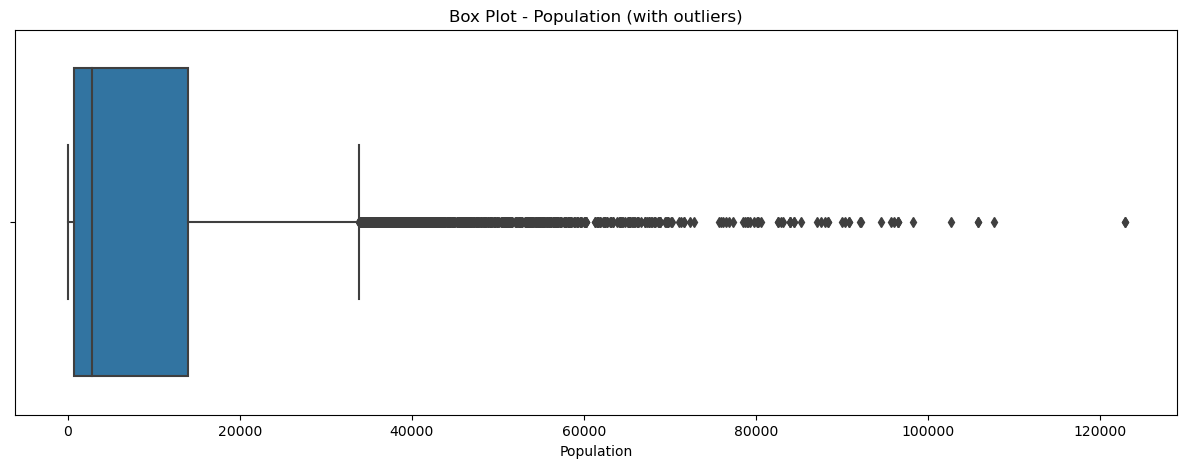


Column: Children
Lower Whisker: -4.5
Upper Whisker: 7.5
Count of Outliers: 411


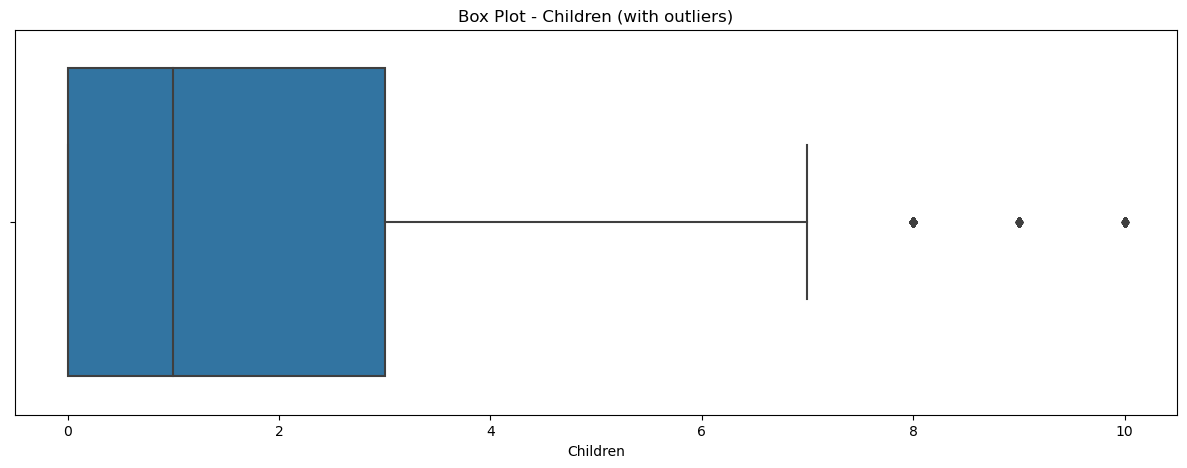


Column: Income
Lower Whisker: -32447.666249999987
Upper Whisker: 106342.84374999999
Count of Outliers: 326


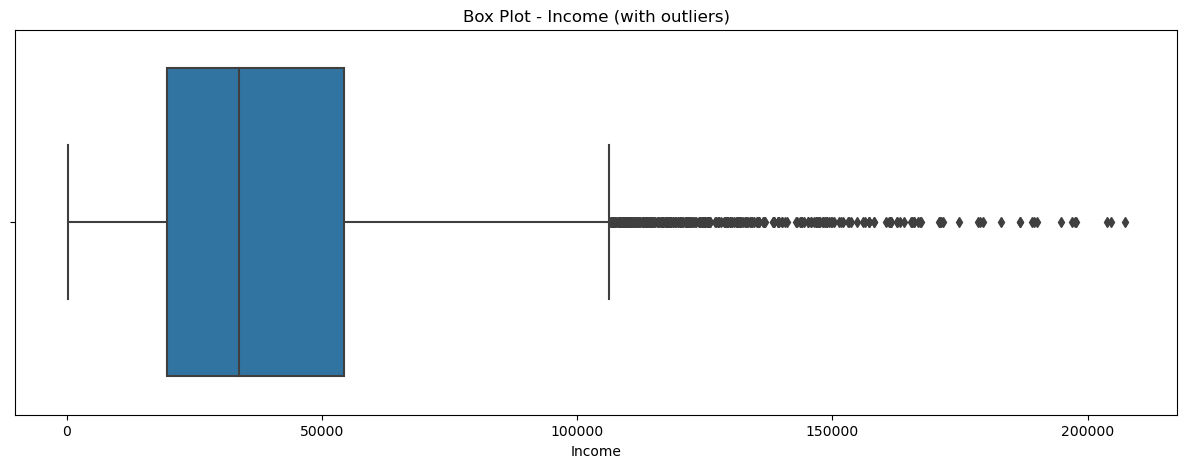


Column: VitD_levels
Lower Whisker: 12.544152781249997
Upper Whisker: 23.430248331250006
Count of Outliers: 60


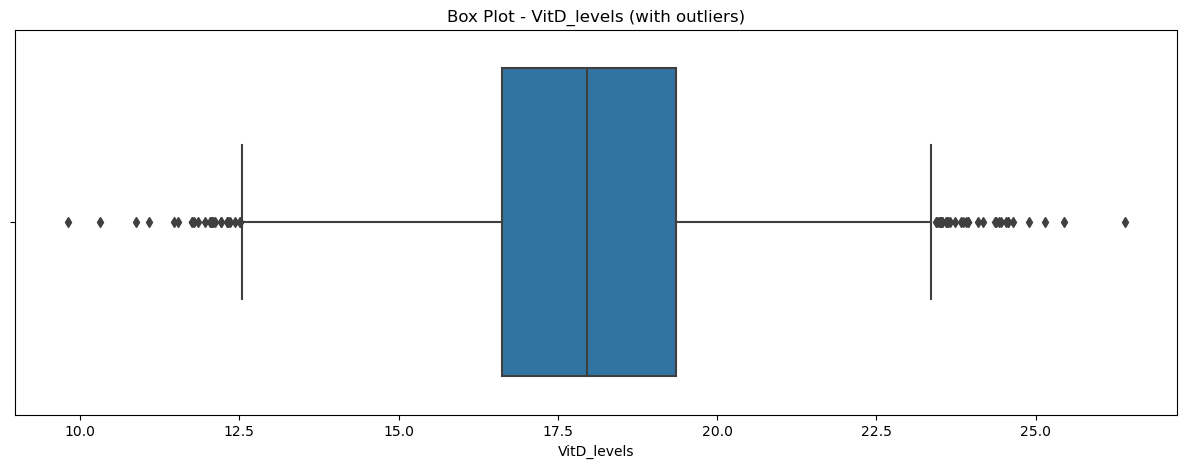


Column: Full_meals_eaten
Lower Whisker: -3.0
Upper Whisker: 5.0
Count of Outliers: 8


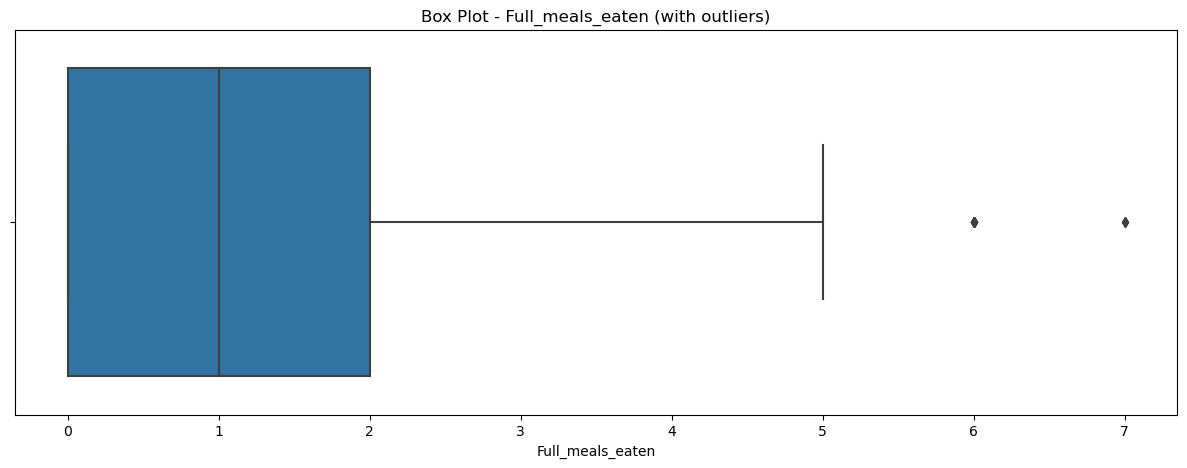


Column: vitD_supp
Lower Whisker: -1.5
Upper Whisker: 2.5
Count of Outliers: 70


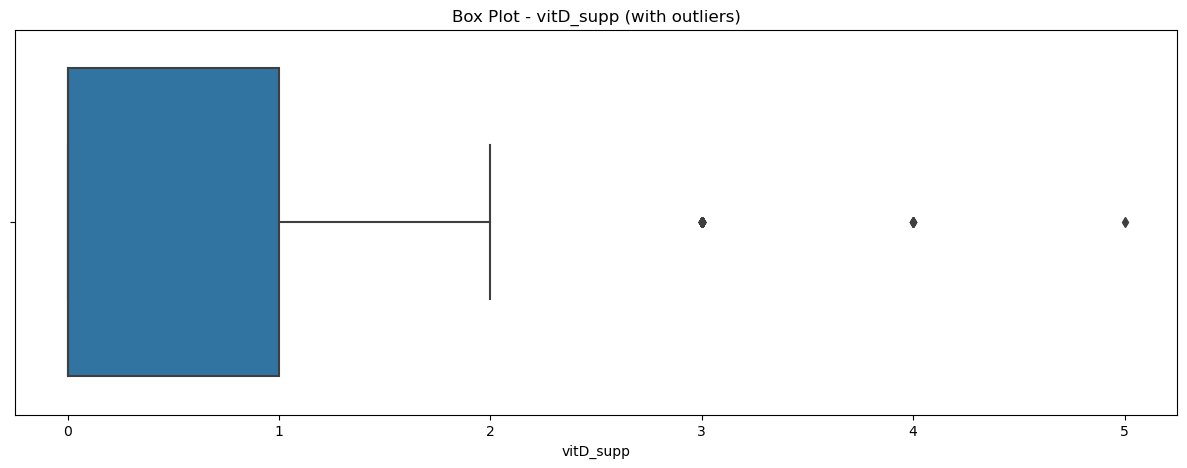


Column: Additional_charges
Lower Whisker: -3473.5156124999994
Upper Whisker: 27086.4933675
Count of Outliers: 424


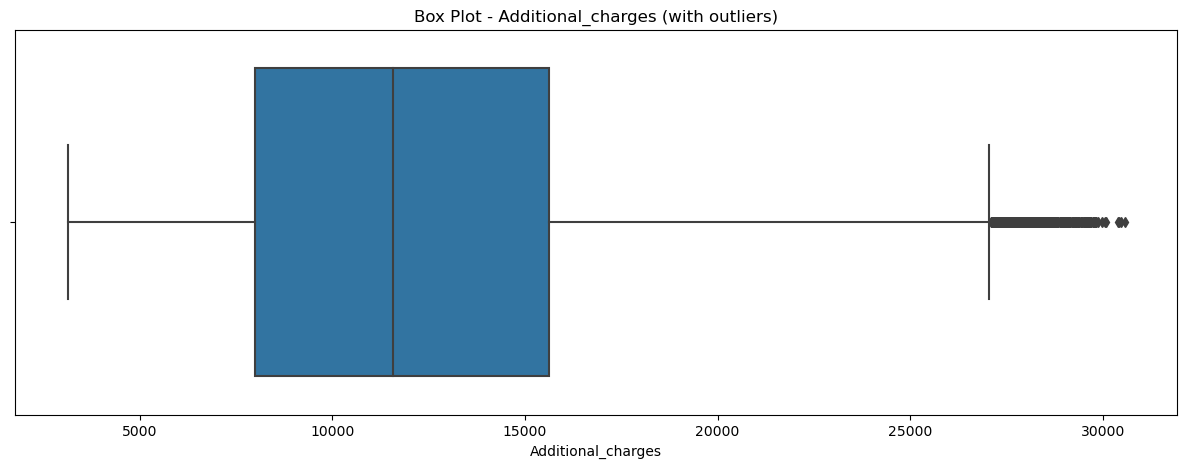


Column: Item1
Lower Whisker: 1.5
Upper Whisker: 5.5
Count of Outliers: 449


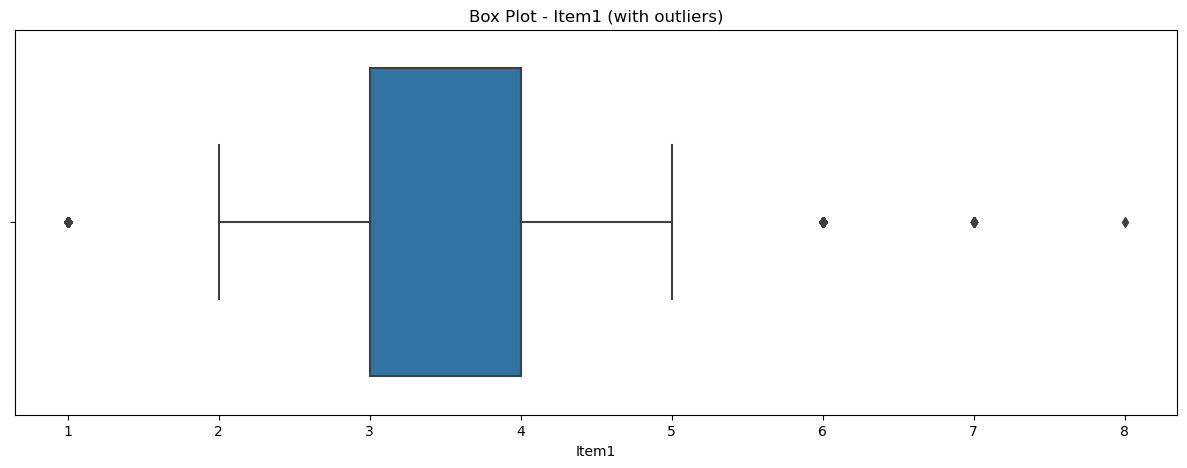


Column: Item2
Lower Whisker: 1.5
Upper Whisker: 5.5
Count of Outliers: 429


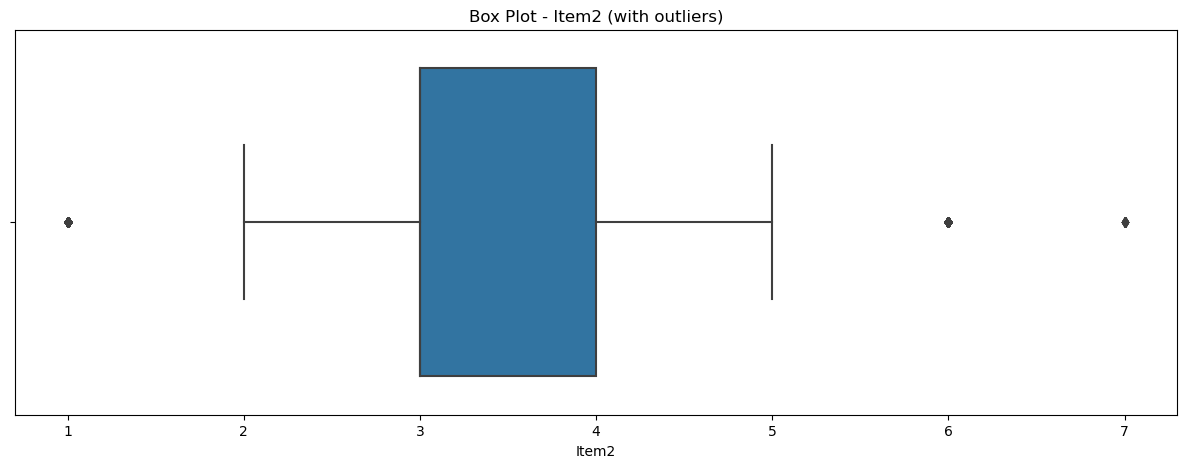


Column: Item3
Lower Whisker: 1.5
Upper Whisker: 5.5
Count of Outliers: 443


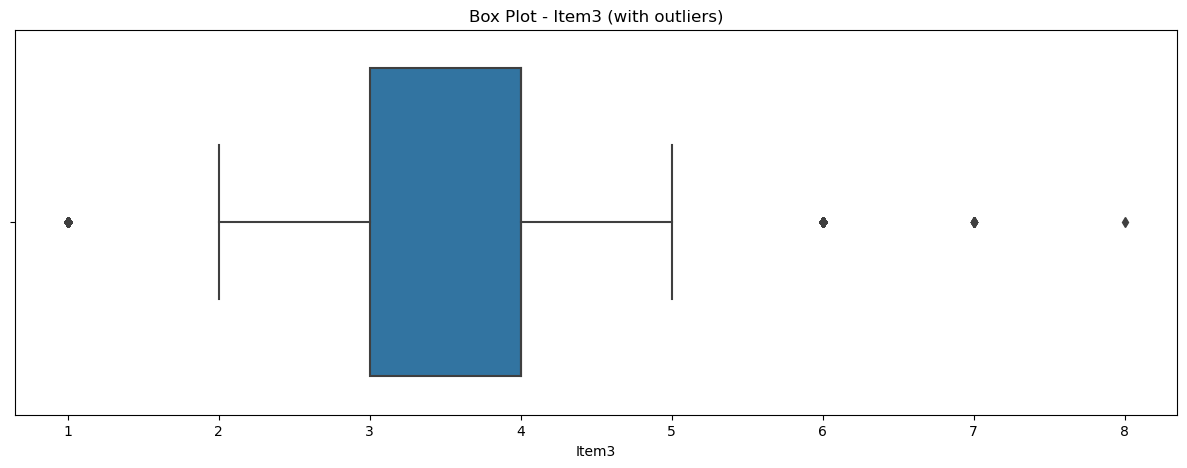


Column: Item4
Lower Whisker: 1.5
Upper Whisker: 5.5
Count of Outliers: 450


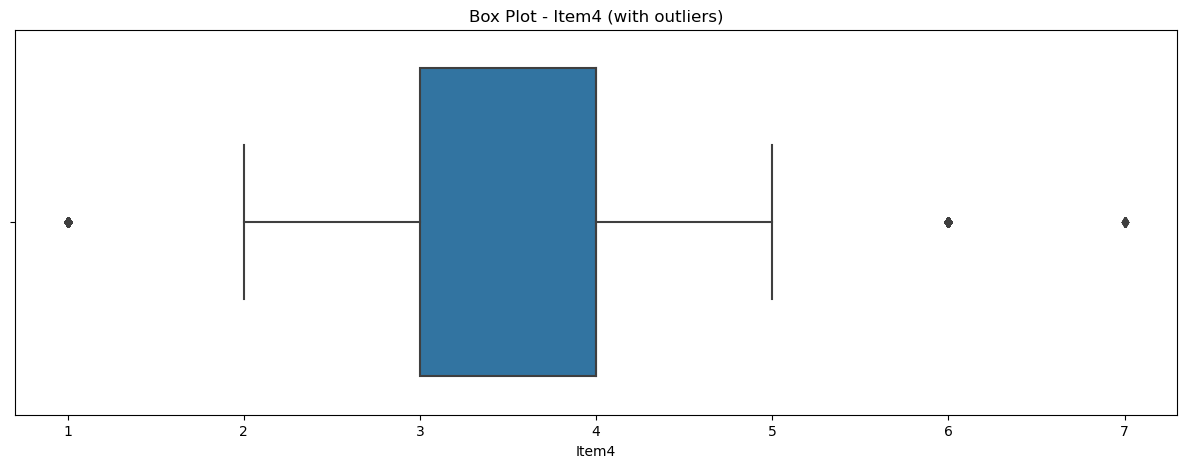


Column: Item5
Lower Whisker: 1.5
Upper Whisker: 5.5
Count of Outliers: 443


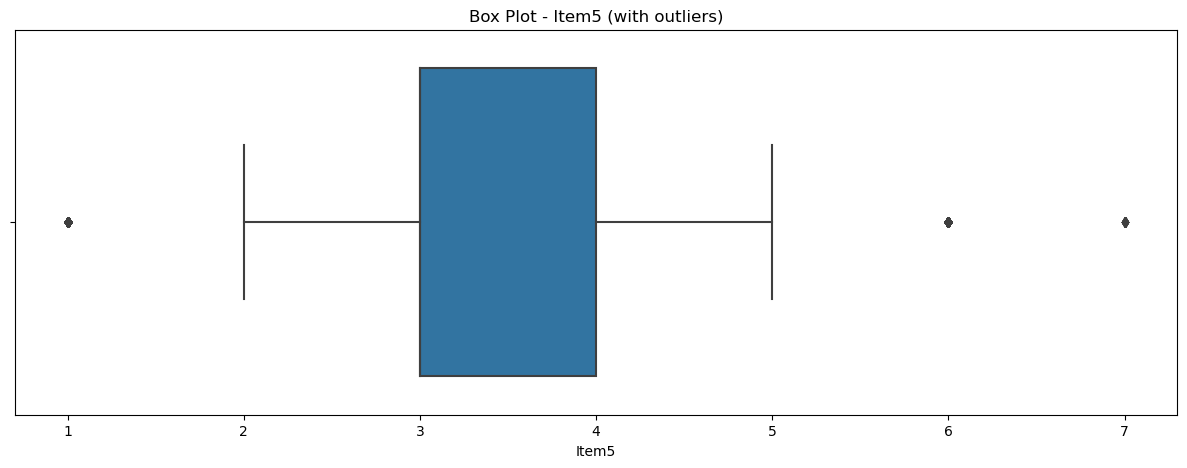


Column: Item6
Lower Whisker: 1.5
Upper Whisker: 5.5
Count of Outliers: 443


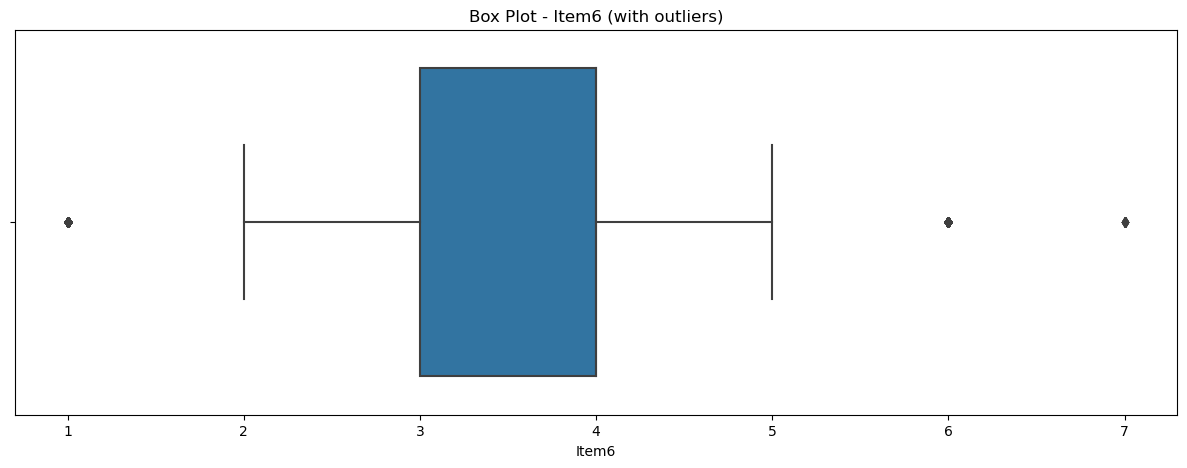


Column: Item7
Lower Whisker: 1.5
Upper Whisker: 5.5
Count of Outliers: 438


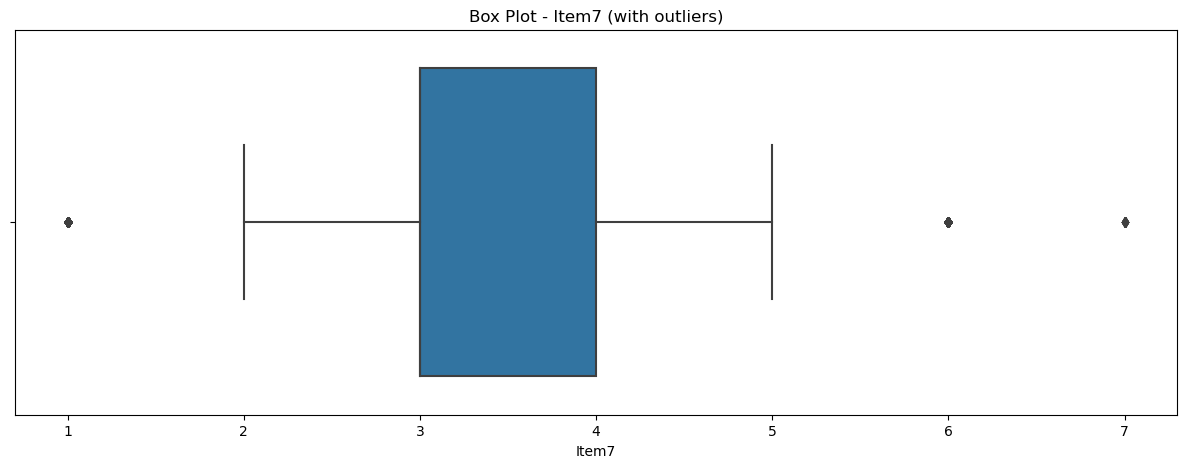


Column: Item8
Lower Whisker: 1.5
Upper Whisker: 5.5
Count of Outliers: 442


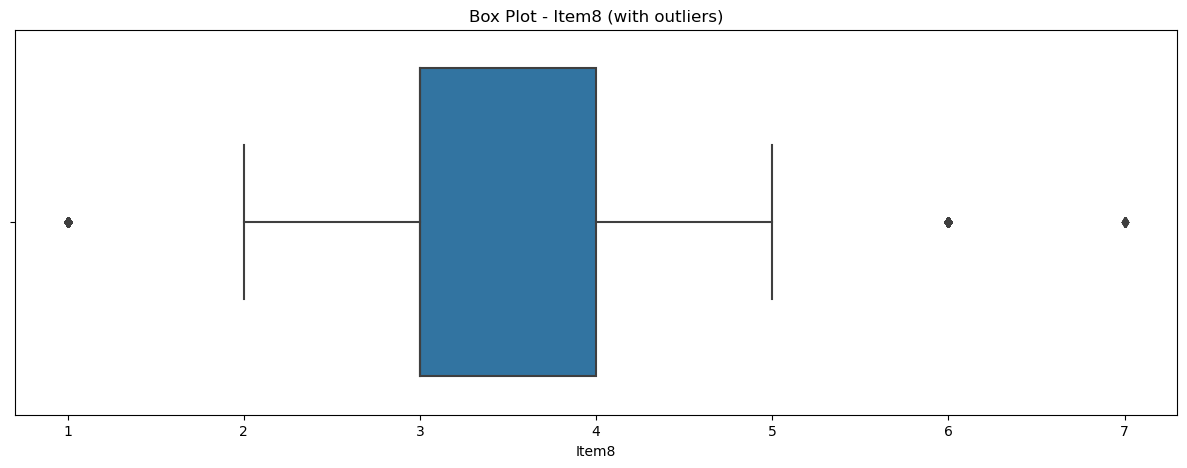

In [4]:
# Calculate descriptive statistics and identify outliers for specific columns of interest
columns_of_interest = ['Lat', 'Lng', 'Population', 'Children', 'Income', 'VitD_levels', 'Full_meals_eaten',
                       'vitD_supp', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4',
                       'Item5', 'Item6', 'Item7', 'Item8']

# Check if columns of interest exist in the DataFrame
for col in columns_of_interest:
    if col not in medical.columns:
        print(f"Column '{col}' does not exist in the DataFrame.")

# Calculate descriptive statistics for each column
stats = medical[columns_of_interest].describe()

# Identify columns with outliers
for col in columns_of_interest:
    q1 = stats.loc['25%', col]
    q3 = stats.loc['75%', col]
    iqr = q3 - q1
    lower_whisker = q1 - 1.5 * iqr
    upper_whisker = q3 + 1.5 * iqr
    outliers = (medical[col] < lower_whisker) | (medical[col] > upper_whisker)
    print(f"\nColumn: {col}")
    print(f"Lower Whisker: {lower_whisker}")
    print(f"Upper Whisker: {upper_whisker}")
    print(f"Count of Outliers: {outliers.sum()}")
    if outliers.any():
        plt.figure(figsize=(15, 5))
        sns.boxplot(x=medical[col])
        plt.title(f'Box Plot - {col} (with outliers)')
        plt.show()


In [5]:
# Select explanatory variables that are independent
X = medical[['Age', 'Gender', 'Income', 'Marital', 'Children', 'VitD_levels', 'Doc_visits', 'Asthma','Arthritis', 'TotalCharge', 'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke', 'Complication_risk', 'Services']]

# Select dependent variable which needs to be binary
Y = medical['ReAdmis']

In [6]:
# Check data types of X
print(X.dtypes)
print(X.head()) 

# Check data type of Y
print(Y.dtype)
print(Y.head()) 

Age                    int64
Gender                object
Income               float64
Marital               object
Children               int64
VitD_levels          float64
Doc_visits             int64
Asthma                object
Arthritis             object
TotalCharge          float64
Soft_drink            object
Initial_admin         object
HighBlood             object
Stroke                object
Complication_risk     object
Services              object
dtype: object
   Age  Gender    Income   Marital  Children  VitD_levels  Doc_visits Asthma  \
0   53    Male  86575.93  Divorced         1    19.141466           6    Yes   
1   51  Female  46805.99   Married         3    18.940352           4     No   
2   53  Female  14370.14   Widowed         3    18.057507           4     No   
3   78    Male  39741.49   Married         0    16.576858           4    Yes   
4   22  Female   1209.56   Widowed         1    17.439069           5     No   

  Arthritis  TotalCharge Soft_drink      

In [7]:
# Select only the numerical columns from X
numerical_columns = X.select_dtypes(include=['int64', 'float64'])

# Summary statistics for numerical features
summary_X = numerical_columns.describe()
print("Summary statistics for X (numerical features only):")
print(summary_X)

# Summary statistics for Y
summary_Y = Y.value_counts()
print("\nSummary statistics for Y:")
print(summary_Y)

# Select only the categorical columns from X
categorical_columns = X.select_dtypes(include=['object'])

# Summary statistics for categorical features
summary_categorical = {}

# Loop through each categorical column
for column in categorical_columns.columns:
    # Calculate frequency counts for each category
    frequency_counts = categorical_columns[column].value_counts()
    # Store the frequency counts in the summary dictionary
    summary_categorical[column] = frequency_counts

# Display summary statistics for categorical features
print("\nSummary statistics for X (categorical features only):")
for column, counts in summary_categorical.items():
    print(f"\n{column}:\n{counts}")

Summary statistics for X (numerical features only):
                Age         Income      Children   VitD_levels    Doc_visits  \
count  10000.000000   10000.000000  10000.000000  10000.000000  10000.000000   
mean      53.511700   40490.495160      2.097200     17.964262      5.012200   
std       20.638538   28521.153293      2.163659      2.017231      1.045734   
min       18.000000     154.080000      0.000000      9.806483      1.000000   
25%       36.000000   19598.775000      0.000000     16.626439      4.000000   
50%       53.000000   33768.420000      1.000000     17.951122      5.000000   
75%       71.000000   54296.402500      3.000000     19.347963      6.000000   
max       89.000000  207249.100000     10.000000     26.394449      9.000000   

        TotalCharge  
count  10000.000000  
mean    5312.172769  
std     2180.393838  
min     1938.312067  
25%     3179.374015  
50%     5213.952000  
75%     7459.699750  
max     9180.728000  

Summary statistics for Y:
Re

In [8]:
# Replace boolean values with integers
Y = Y.replace({'Yes': 1,'No': 0})

In [9]:
# Check for unique variables
for column in X.columns:
    unique_values = X[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in Age: [53 51 78 22 76 50 40 48 55 64 41 45 85 57 44 54 72 84 86 52 31 37 19 75
 70 69 56 32 27 65 25 79 24 89 58 60 33 83 66 73 35 43 63 36 39 29 20 34
 47 18 59 82 26 74 38 28 77 30 87 23 80 71 68 67 88 62 49 21 61 81 42 46]
Unique values in Gender: ['Male' 'Female' 'Nonbinary']
Unique values in Income: [86575.93 46805.99 14370.14 ... 65917.81 29702.32 62682.63]
Unique values in Marital: ['Divorced' 'Married' 'Widowed' 'Never Married' 'Separated']
Unique values in Children: [ 1  3  0  7  2  4 10  5  8  6  9]
Unique values in VitD_levels: [19.1414657  18.9403523  18.05750734 ... 17.12907    19.91043
 18.38862   ]
Unique values in Doc_visits: [6 4 5 7 3 2 8 9 1]
Unique values in Asthma: ['Yes' 'No']
Unique values in Arthritis: ['Yes' 'No']
Unique values in TotalCharge: [3726.70286  4193.190458 2434.234222 ... 8276.481    7644.483
 7887.553   ]
Unique values in Soft_drink: ['No' 'Yes']
Unique values in Initial_admin: ['Emergency Admission' 'Elective Admission' 'Observatio

In [10]:
# One-hot encoding for categorical variables
# Dropping the first category to avoid the dummy variable trap
x_encoded = pd.get_dummies(X[['Gender', 'Marital', 'Initial_admin', 'Complication_risk', 'Services']], drop_first=True)

# Make a copy of X to avoid SettingWithCopyWarning
X_copy = X.copy()

# Label encoding for binary columns
binary_columns = ['HighBlood', 'Stroke', 'Asthma', 'Soft_drink', 'Arthritis']
for col in binary_columns:
    X_copy[col] = X_copy[col].map({'No': 0, 'Yes': 1})

# Concatenate the original DataFrame with one-hot encoded features
X_final = pd.concat([X_copy.drop(columns=['Gender', 'Marital', 'Initial_admin', 'Complication_risk', 'Services']), x_encoded], axis=1)

# Replace boolean values with integers in the X_final DataFrame
X_final = X_final.replace({True: 1, False: 0})

# Check the data types and values in the final DataFrame
print(X_final.dtypes)
print(X_final.head())

Age                                      int64
Income                                 float64
Children                                 int64
VitD_levels                            float64
Doc_visits                               int64
Asthma                                   int64
Arthritis                                int64
TotalCharge                            float64
Soft_drink                               int64
HighBlood                                int64
Stroke                                   int64
Gender_Male                              int64
Gender_Nonbinary                         int64
Marital_Married                          int64
Marital_Never Married                    int64
Marital_Separated                        int64
Marital_Widowed                          int64
Initial_admin_Emergency Admission        int64
Initial_admin_Observation Admission      int64
Complication_risk_Low                    int64
Complication_risk_Medium                 int64
Services_CT S

In [11]:
# Rename X_final to X
X = X_final

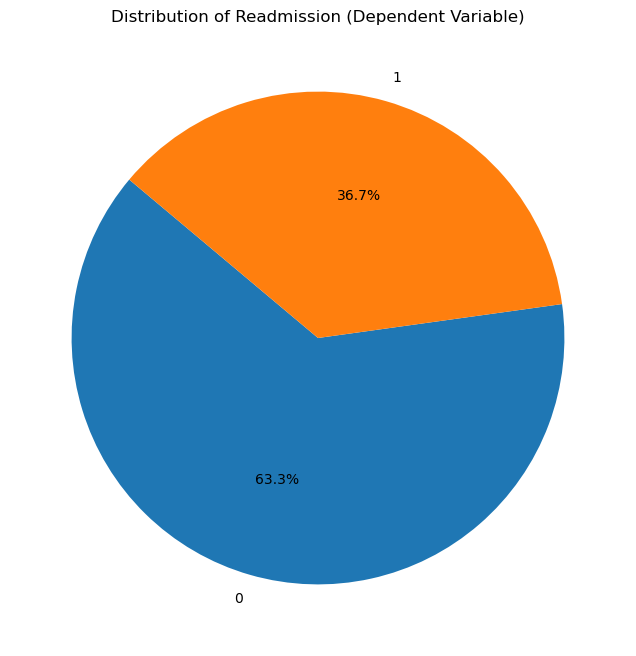

In [12]:
# Univariate visualization of the dependent variable (Y)
plt.figure(figsize=(8, 8))
plt.pie(Y.value_counts(), labels=Y.unique(), autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Readmission (Dependent Variable)')
plt.show()

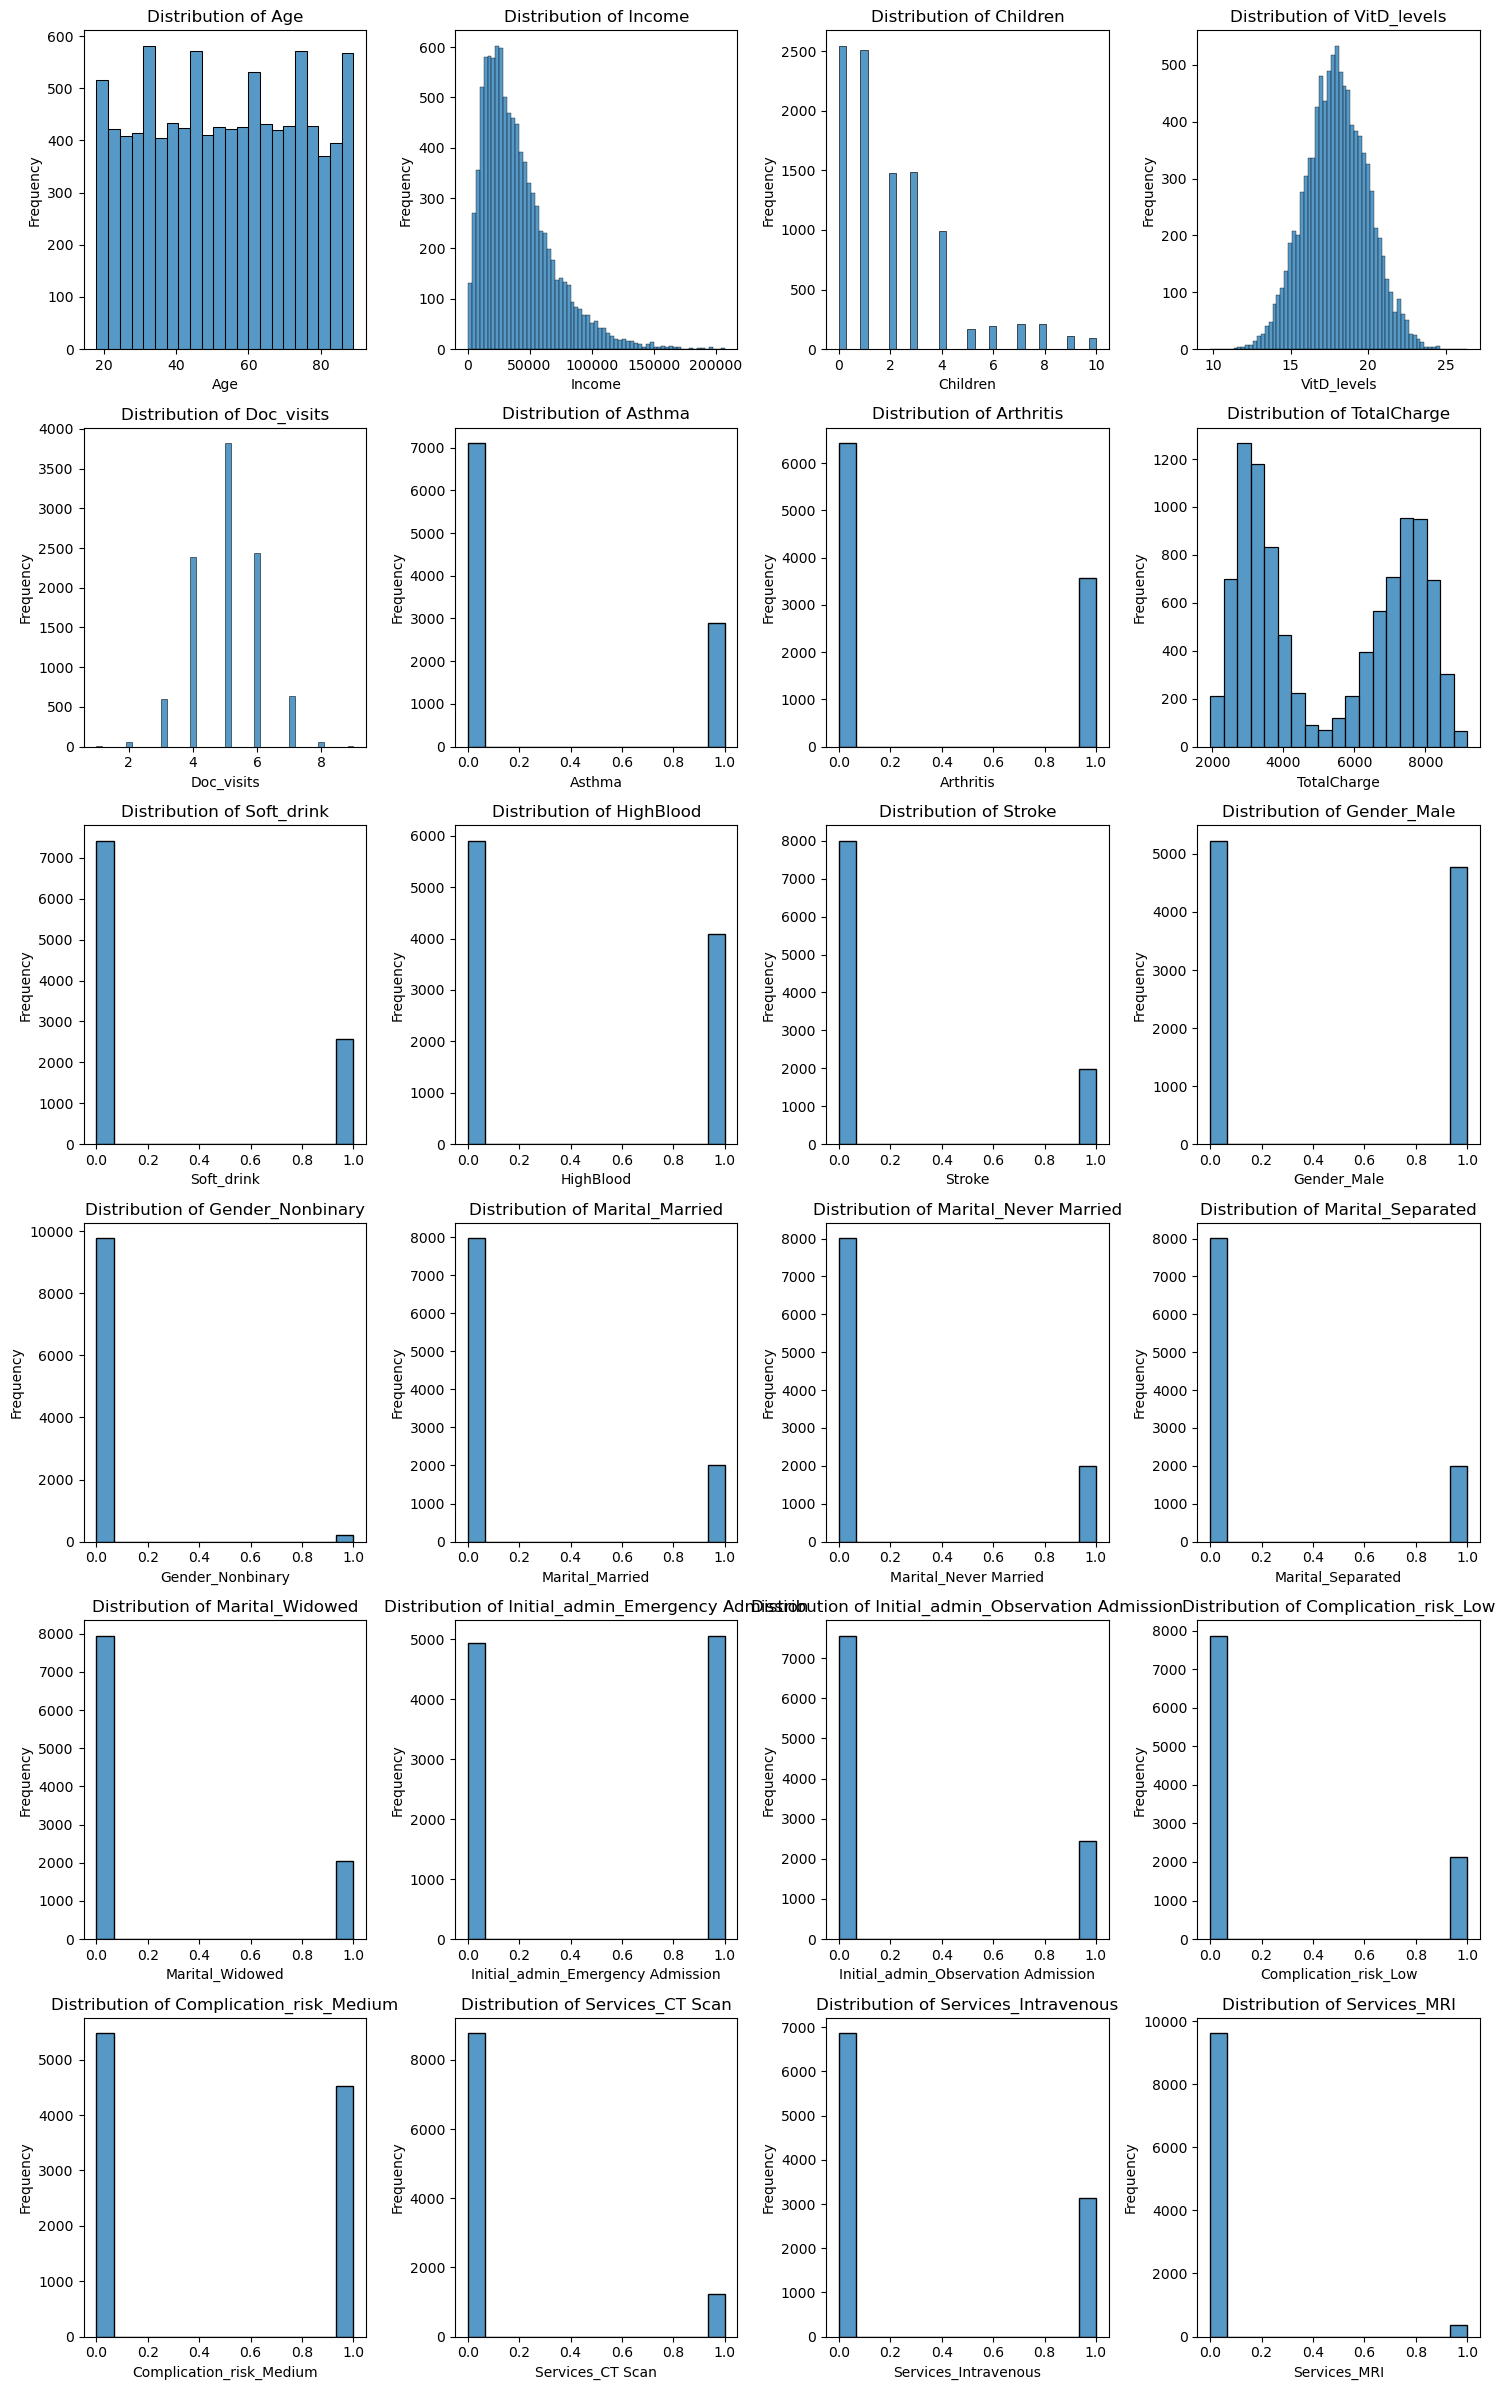

In [13]:
# univariate visualizations of independent variables
# Determine the number of rows and columns for subplots
num_cols = len(X.columns)
num_rows = (num_cols + 3) // 4  # Adjusted to ensure there are enough rows for all subplots

# Set figure size
plt.figure(figsize=(15, 4 * num_rows))

# Loop through each column in X
for i, column in enumerate(X.columns):
    # Create subplots
    plt.subplot(num_rows, 4, i + 1)
    
    # Plot the histogram
    sns.histplot(X[column])
    
    # Set title, xlabel, and ylabel
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

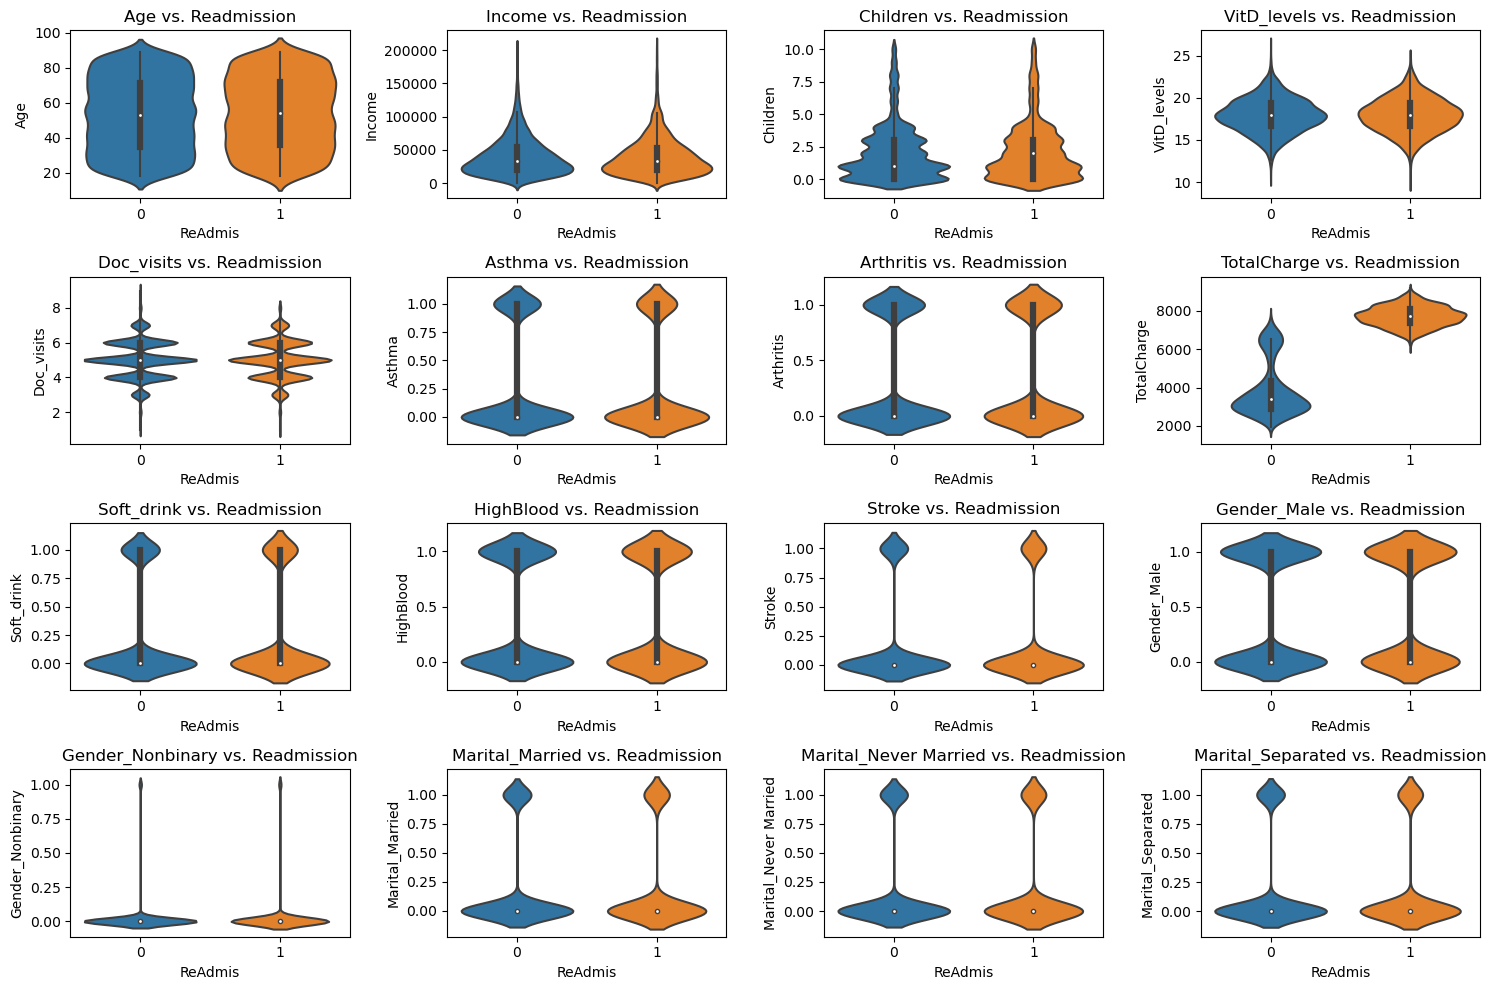

In [14]:
# Bivariate visualization of the dependent variable (Y) with selected independent variables
# Set the figure size
plt.figure(figsize=(15, 10))

# Determine the number of columns to loop through (maximum of 16)
num_columns = min(len(X.columns), 16)

# Loop through each column in X
for i in range(num_columns):
    # Create subplots in a 4x4 grid
    plt.subplot(4, 4, i + 1)
    
    # Plot the violin plot
    sns.violinplot(x=Y, y=X.iloc[:, i])  # Change X[column] to X.iloc[:, i]
    
    # Set title, xlabel, and ylabel
    plt.title(f'{X.columns[i]} vs. Readmission')
    plt.xlabel('ReAdmis')
    plt.ylabel(X.columns[i])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [15]:
# Write the DataFrame to a CSV file
data_combined = pd.concat([X, Y], axis=1)

data_combined.to_csv('Data_using.csv')

In [16]:
# Fit logistic regression model using statsmodels and print summary of results
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.181029
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9976
Method:                           MLE   Df Model:                           23
Date:                Wed, 29 May 2024   Pseudo R-squ.:                  0.7246
Time:                        23:03:38   Log-Likelihood:                -1810.3
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Age                                    -0.0168      0.002 

In [17]:
# Calculate AIC
aic_value = result.aic
print("AIC value:", aic_value)

AIC value: 3668.5858552220707


In [18]:
# Calculate VIF for all variables
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print VIF for all variables
print("\nVariance Inflation Factor (VIF) for All Features:")
print(vif)


Variance Inflation Factor (VIF) for All Features:
                               Features        VIF
0                                   Age   7.383113
1                                Income   2.966202
2                              Children   1.933495
3                           VitD_levels  32.407109
4                            Doc_visits  19.947971
5                                Asthma   1.404730
6                             Arthritis   1.558268
7                           TotalCharge   6.780093
8                            Soft_drink   1.347003
9                             HighBlood   1.690738
10                               Stroke   1.248680
11                          Gender_Male   1.933627
12                     Gender_Nonbinary   1.044528
13                      Marital_Married   1.996911
14                Marital_Never Married   1.970158
15                    Marital_Separated   1.974233
16                      Marital_Widowed   2.003778
17    Initial_admin_Emergency A

In [19]:
# Filter out features excluding VitD_levels
selected_features = vif[vif['Features'] != 'VitD_levels']['Features']

# Recreate feature matrix X with selected features
X_filtered = X[selected_features]

# Print VIF for the selected features
vif_filtered = pd.DataFrame()
vif_filtered["Features"] = X_filtered.columns
vif_filtered["VIF"] = [variance_inflation_factor(X_filtered.values, i) for i in range(X_filtered.shape[1])]

# Print VIF for selected features
print("\nVariance Inflation Factor (VIF) after removing VitD_levels:")
print(vif_filtered)


Variance Inflation Factor (VIF) after removing VitD_levels:
                               Features        VIF
0                                   Age   6.788348
1                                Income   2.902657
2                              Children   1.913181
3                            Doc_visits  13.515926
4                                Asthma   1.396280
5                             Arthritis   1.552672
6                           TotalCharge   6.334649
7                            Soft_drink   1.342838
8                             HighBlood   1.679565
9                                Stroke   1.244060
10                          Gender_Male   1.911099
11                     Gender_Nonbinary   1.042894
12                      Marital_Married   1.939174
13                Marital_Never Married   1.906134
14                    Marital_Separated   1.914277
15                      Marital_Widowed   1.944802
16    Initial_admin_Emergency Admission   2.936604
17  Initial_admin_Obs

In [20]:
# Filter out features excluding Doc_visits
selected_features = vif_filtered[vif_filtered['Features'] != 'Doc_visits']['Features']

# Recreate feature matrix X with selected features
X_filtered = X[selected_features]

# Print VIF for the selected features
vif_filtered = pd.DataFrame()
vif_filtered["Features"] = X_filtered.columns
vif_filtered["VIF"] = [variance_inflation_factor(X_filtered.values, i) for i in range(X_filtered.shape[1])]

# Print VIF for selected features
print("\nVariance Inflation Factor (VIF) after removing Doc_visits:")
print(vif_filtered)


Variance Inflation Factor (VIF) after removing Doc_visits:
                               Features       VIF
0                                   Age  6.000685
1                                Income  2.790651
2                              Children  1.891178
3                                Asthma  1.391183
4                             Arthritis  1.545369
5                           TotalCharge  5.777901
6                            Soft_drink  1.334821
7                             HighBlood  1.662410
8                                Stroke  1.239439
9                           Gender_Male  1.881228
10                     Gender_Nonbinary  1.041403
11                      Marital_Married  1.872144
12                Marital_Never Married  1.835221
13                    Marital_Separated  1.843733
14                      Marital_Widowed  1.874273
15    Initial_admin_Emergency Admission  2.825492
16  Initial_admin_Observation Admission  1.841008
17                Complication_risk_Low 

In [21]:
# Filter out features excluding Age
selected_features = vif_filtered[vif_filtered['Features'] != 'Age']['Features']

# Recreate feature matrix X with selected features
X_filtered = X[selected_features]

# Print VIF for the selected features
vif_filtered = pd.DataFrame()
vif_filtered["Features"] = X_filtered.columns
vif_filtered["VIF"] = [variance_inflation_factor(X_filtered.values, i) for i in range(X_filtered.shape[1])]

# Print VIF for selected features
print("\nVariance Inflation Factor (VIF) after removing Age:")
print(vif_filtered)


Variance Inflation Factor (VIF) after removing Age:
                               Features       VIF
0                                Income  2.735430
1                              Children  1.872411
2                                Asthma  1.384106
3                             Arthritis  1.539089
4                           TotalCharge  5.331508
5                            Soft_drink  1.330937
6                             HighBlood  1.650534
7                                Stroke  1.234161
8                           Gender_Male  1.866957
9                      Gender_Nonbinary  1.040271
10                      Marital_Married  1.819002
11                Marital_Never Married  1.791469
12                    Marital_Separated  1.795076
13                      Marital_Widowed  1.822606
14    Initial_admin_Emergency Admission  2.773847
15  Initial_admin_Observation Admission  1.809412
16                Complication_risk_Low  1.538695
17             Complication_risk_Medium  2.1424

In [22]:
# Filter out features excluding TotalCharge
selected_features = vif_filtered[vif_filtered['Features'] != 'TotalCharge']['Features']

# Recreate feature matrix X with selected features
X_filtered = X[selected_features]

# Print VIF for the selected features
vif_filtered = pd.DataFrame()
vif_filtered["Features"] = X_filtered.columns
vif_filtered["VIF"] = [variance_inflation_factor(X_filtered.values, i) for i in range(X_filtered.shape[1])]

# Print VIF for selected features
print("\nVariance Inflation Factor (VIF) after removing TotalCharge:")
print(vif_filtered)


Variance Inflation Factor (VIF) after removing TotalCharge:
                               Features       VIF
0                                Income  2.655481
1                              Children  1.836057
2                                Asthma  1.378935
3                             Arthritis  1.520628
4                            Soft_drink  1.324114
5                             HighBlood  1.626986
6                                Stroke  1.229163
7                           Gender_Male  1.834322
8                      Gender_Nonbinary  1.038042
9                       Marital_Married  1.733136
10                Marital_Never Married  1.696925
11                    Marital_Separated  1.701557
12                      Marital_Widowed  1.729071
13    Initial_admin_Emergency Admission  2.550651
14  Initial_admin_Observation Admission  1.756655
15                Complication_risk_Low  1.527446
16             Complication_risk_Medium  2.127817
17                     Services_CT Scan

In [23]:
# Rename X_filtered back to X
X = X_filtered

# Display the new feature matrix
print("Feature matrix X after renaming:")
print(X)

Feature matrix X after renaming:
        Income  Children  Asthma  Arthritis  Soft_drink  HighBlood  Stroke  \
0     86575.93         1       1          1           0          1       0   
1     46805.99         3       0          0           0          1       0   
2     14370.14         3       0          0           0          1       0   
3     39741.49         0       1          1           0          0       1   
4      1209.56         1       0          0           1          0       0   
...        ...       ...     ...        ...         ...        ...     ...   
9995  45967.61         2       0          0           0          1       0   
9996  14983.02         4       1          1           0          1       0   
9997  65917.81         3       0          0           1          1       0   
9998  29702.32         3       0          0           0          0       0   
9999  62682.63         8       0          1           0          0       0   

      Gender_Male  Gender_Nonb

In [24]:
# Fit logistic regression model using statsmodels and print summary of results
logit_model=sm.Logit(Y,X) 
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.659393
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9980
Method:                           MLE   Df Model:                           19
Date:                Wed, 29 May 2024   Pseudo R-squ.:               -0.003206
Time:                        23:03:45   Log-Likelihood:                -6593.9
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Income                              -2.973e-06   6.92e-07 

In [25]:
# Calculate AIC
aic_value = result.aic
print("AIC value:", aic_value)

AIC value: 13227.850082451685


In [26]:
# BACKWARD ELIMINATION
# Remove the variables with high p-values 
# Step 1: Identify variables with high p-values
variables_to_remove = ['Gender_Nonbinary']

# Step 2: Create a new feature matrix excluding variables with high p-values
X = X.drop(variables_to_remove, axis=1)

# Step 3: Fit the logistic regression model using the updated feature matrix
logit_model_new = sm.Logit(Y, X)
result_new = logit_model_new.fit()

# Print the summary of the new model
print(result_new.summary())

Optimization terminated successfully.
         Current function value: 0.659394
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9981
Method:                           MLE   Df Model:                           18
Date:                Wed, 29 May 2024   Pseudo R-squ.:               -0.003208
Time:                        23:03:45   Log-Likelihood:                -6593.9
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Income                               -2.97e-06   6.91e-07 

In [27]:
# BACKWARD ELIMINATION
# Remove the variables with high p-values 
# Step 1: Identify variables with high p-values
variables_to_remove = ['Services_MRI']

# Step 2: Create a new feature matrix excluding variables with high p-values
X = X.drop(variables_to_remove, axis=1)

# Step 3: Fit the logistic regression model using the updated feature matrix
logit_model_new = sm.Logit(Y, X)
result_new = logit_model_new.fit()

# Print the summary of the new model
print(result_new.summary())

Optimization terminated successfully.
         Current function value: 0.659395
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9982
Method:                           MLE   Df Model:                           17
Date:                Wed, 29 May 2024   Pseudo R-squ.:               -0.003210
Time:                        23:03:46   Log-Likelihood:                -6593.9
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Income                              -2.967e-06   6.91e-07 

In [28]:
# BACKWARD ELIMINATION
# Remove the variables with high p-values 
# Step 1: Identify variables with high p-values
variables_to_remove = ['Children']

# Step 2: Create a new feature matrix excluding variables with high p-values
X = X.drop(variables_to_remove, axis=1)

# Step 3: Fit the logistic regression model using the updated feature matrix
logit_model_new = sm.Logit(Y, X)
result_new = logit_model_new.fit()

# Print the summary of the new model
print(result_new.summary())

Optimization terminated successfully.
         Current function value: 0.659403
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9983
Method:                           MLE   Df Model:                           16
Date:                Wed, 29 May 2024   Pseudo R-squ.:               -0.003222
Time:                        23:03:46   Log-Likelihood:                -6594.0
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Income                              -2.939e-06   6.87e-07 

In [29]:
# BACKWARD ELIMINATION
# Remove the variables with high p-values 
# Step 1: Identify variables with high p-values
variables_to_remove = ['Soft_drink']

# Step 2: Create a new feature matrix excluding variables with high p-values
X = X.drop(variables_to_remove, axis=1)

# Step 3: Fit the logistic regression model using the updated feature matrix
logit_model_new = sm.Logit(Y, X)
result_new = logit_model_new.fit()

# Print the summary of the new model
print(result_new.summary())

Optimization terminated successfully.
         Current function value: 0.659411
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9984
Method:                           MLE   Df Model:                           15
Date:                Wed, 29 May 2024   Pseudo R-squ.:               -0.003234
Time:                        23:03:46   Log-Likelihood:                -6594.1
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Income                              -2.956e-06   6.86e-07 

In [30]:
# BACKWARD ELIMINATION
# Remove the variables with high p-values 
# Step 1: Identify variables with high p-values
variables_to_remove = ['Arthritis']

# Step 2: Create a new feature matrix excluding variables with high p-values
X = X.drop(variables_to_remove, axis=1)

# Step 3: Fit the logistic regression model using the updated feature matrix
logit_model_new = sm.Logit(Y, X)
result_new = logit_model_new.fit()

# Print the summary of the new model
print(result_new.summary())

Optimization terminated successfully.
         Current function value: 0.659436
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9985
Method:                           MLE   Df Model:                           14
Date:                Wed, 29 May 2024   Pseudo R-squ.:               -0.003272
Time:                        23:03:46   Log-Likelihood:                -6594.4
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Income                              -2.987e-06   6.85e-07 

In [31]:
# BACKWARD ELIMINATION
# Remove the variables with high p-values 
# Step 1: Identify variables with high p-values
variables_to_remove = ['Services_CT Scan']

# Step 2: Create a new feature matrix excluding variables with high p-values
X = X.drop(variables_to_remove, axis=1)

# Step 3: Fit the logistic regression model using the updated feature matrix
logit_model_new = sm.Logit(Y, X)
result_new = logit_model_new.fit()

# Print the summary of the new model
print(result_new.summary())

Optimization terminated successfully.
         Current function value: 0.659464
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9986
Method:                           MLE   Df Model:                           13
Date:                Wed, 29 May 2024   Pseudo R-squ.:               -0.003315
Time:                        23:03:46   Log-Likelihood:                -6594.6
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Income                              -2.958e-06   6.84e-07 

In [32]:
# BACKWARD ELIMINATION
# Remove the variables with high p-values 
# Step 1: Identify variables with high p-values
variables_to_remove = ['Stroke']

# Step 2: Create a new feature matrix excluding variables with high p-values
X = X.drop(variables_to_remove, axis=1)

# Step 3: Fit the logistic regression model using the updated feature matrix
logit_model_new = sm.Logit(Y, X)
result_new = logit_model_new.fit()

# Print the summary of the new model
print(result_new.summary())

Optimization terminated successfully.
         Current function value: 0.659515
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9987
Method:                           MLE   Df Model:                           12
Date:                Wed, 29 May 2024   Pseudo R-squ.:               -0.003392
Time:                        23:03:47   Log-Likelihood:                -6595.1
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Income                              -2.999e-06   6.82e-07 

In [33]:
# BACKWARD ELIMINATION
# Remove the variables with high p-values 
# Step 1: Identify variables with high p-values
variables_to_remove = ['Gender_Male']

# Step 2: Create a new feature matrix excluding variables with high p-values
X = X.drop(variables_to_remove, axis=1)

# Step 3: Fit the logistic regression model using the updated feature matrix
logit_model_new = sm.Logit(Y, X)
result_new = logit_model_new.fit()

# Print the summary of the new model
print(result_new.summary())

Optimization terminated successfully.
         Current function value: 0.659574
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9988
Method:                           MLE   Df Model:                           11
Date:                Wed, 29 May 2024   Pseudo R-squ.:               -0.003482
Time:                        23:03:47   Log-Likelihood:                -6595.7
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Income                              -3.083e-06   6.78e-07 

In [34]:
# BACKWARD ELIMINATION
# Remove the variables with high p-values 
# Step 1: Identify variables with high p-values
variables_to_remove = ['HighBlood']

# Step 2: Create a new feature matrix excluding variables with high p-values
X = X.drop(variables_to_remove, axis=1)

# Step 3: Fit the logistic regression model using the updated feature matrix
logit_model_new = sm.Logit(Y, X)
result_new = logit_model_new.fit()

# Print the summary of the new model
print(result_new.summary())

Optimization terminated successfully.
         Current function value: 0.659711
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9989
Method:                           MLE   Df Model:                           10
Date:                Wed, 29 May 2024   Pseudo R-squ.:               -0.003691
Time:                        23:03:47   Log-Likelihood:                -6597.1
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Income                                -3.2e-06   6.75e-07 

In [35]:
# BACKWARD ELIMINATION
# Remove the variables with high p-values 
# Step 1: Identify variables with high p-values
variables_to_remove = ['Marital_Widowed']

# Step 2: Create a new feature matrix excluding variables with high p-values
X = X.drop(variables_to_remove, axis=1)

# Step 3: Fit the logistic regression model using the updated feature matrix
logit_model_new = sm.Logit(Y, X)
result_new = logit_model_new.fit()

# Print the summary of the new model
print(result_new.summary())

Optimization terminated successfully.
         Current function value: 0.659885
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9990
Method:                           MLE   Df Model:                            9
Date:                Wed, 29 May 2024   Pseudo R-squ.:               -0.003955
Time:                        23:04:03   Log-Likelihood:                -6598.8
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Income                              -3.459e-06   6.62e-07 

In [36]:
# BACKWARD ELIMINATION
# Remove the variables with high p-values 
# Step 1: Identify variables with high p-values
variables_to_remove = ['Marital_Never Married']

# Step 2: Create a new feature matrix excluding variables with high p-values
X = X.drop(variables_to_remove, axis=1)

# Step 3: Fit the logistic regression model using the updated feature matrix
logit_model_new = sm.Logit(Y, X)
result_new = logit_model_new.fit()

# Print the summary of the new model
print(result_new.summary())

Optimization terminated successfully.
         Current function value: 0.659997
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9991
Method:                           MLE   Df Model:                            8
Date:                Wed, 29 May 2024   Pseudo R-squ.:               -0.004125
Time:                        23:04:14   Log-Likelihood:                -6600.0
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Income                              -3.622e-06   6.53e-07 

In [37]:
# BACKWARD ELIMINATION
# Remove the variables with high p-values 
# Step 1: Identify variables with high p-values
variables_to_remove = ['Marital_Married']

# Step 2: Create a new feature matrix excluding variables with high p-values
X = X.drop(variables_to_remove, axis=1)

# Step 3: Fit the logistic regression model using the updated feature matrix
logit_model_new = sm.Logit(Y, X)
result_new = logit_model_new.fit()

# Print the summary of the new model
print(result_new.summary())

Optimization terminated successfully.
         Current function value: 0.660074
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9992
Method:                           MLE   Df Model:                            7
Date:                Wed, 29 May 2024   Pseudo R-squ.:               -0.004243
Time:                        23:04:18   Log-Likelihood:                -6600.7
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Income                              -3.709e-06    6.5e-07 

In [38]:
# BACKWARD ELIMINATION
# Remove the variables with high p-values 
# Step 1: Identify variables with high p-values
variables_to_remove = ['Marital_Separated']

# Step 2: Create a new feature matrix excluding variables with high p-values
X = X.drop(variables_to_remove, axis=1)

# Step 3: Fit the logistic regression model using the updated feature matrix
logit_model_new = sm.Logit(Y, X)
result_new = logit_model_new.fit()

# Print the summary of the new model
print(result_new.summary())

Optimization terminated successfully.
         Current function value: 0.660188
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9993
Method:                           MLE   Df Model:                            6
Date:                Wed, 29 May 2024   Pseudo R-squ.:               -0.004416
Time:                        23:04:23   Log-Likelihood:                -6601.9
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Income                              -3.796e-06   6.47e-07 

In [39]:
# Calculate AIC
aic_value = result.aic
print("AIC value:", aic_value)

AIC value: 13227.850082451685


In [40]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Initialize and fit the logistic regression model on the training set with selected features
logreg_reduced = LogisticRegression()
logreg_reduced.fit(X_train, y_train)

# Predict the target variable on the test set using the reduced model
y_pred_reduced = logreg_reduced.predict(X_test)

# Calculate the confusion matrix for the reduced model
confusion_matrix_reduced = confusion_matrix(y_test, y_pred_reduced)
print("\nConfusion matrix for the reduced logistic regression model:")
print(confusion_matrix_reduced)

# Calculate the accuracy for the reduced model
accuracy_reduced = accuracy_score(y_test, y_pred_reduced)
print("\nAccuracy of the reduced logistic regression model on the test set: {:.2f}".format(accuracy_reduced))

# Compare the initial and reduced logistic regression models
print("\nComparison of the initial and reduced logistic regression models:")
print("\nInitial model:")
print(result.summary())
print("\nReduced model:")
print(result_new.summary())
    
# Calculate percentage change in odds for each coefficient
print("\nCalculation of percentage change in odds:")
coefficients_reduced = result_new.params

for feature, coeff in coefficients_reduced.items():
    odds = np.exp(coeff)
    percentage_change_in_odds = (odds - 1) * 100
    equation = f"(exp({coeff}) – 1) * 100"
    print(f"Percentage change in odds for {feature} = {equation} = {percentage_change_in_odds:.4f}%")


Confusion matrix for the reduced logistic regression model:
[[1934    0]
 [1066    0]]

Accuracy of the reduced logistic regression model on the test set: 0.64

Comparison of the initial and reduced logistic regression models:

Initial model:
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9980
Method:                           MLE   Df Model:                           19
Date:                Wed, 29 May 2024   Pseudo R-squ.:               -0.003206
Time:                        23:05:13   Log-Likelihood:                -6593.9
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
--------------------

In [41]:
# Interpretation for Income
income_odds_change = -0.0004  # Change in odds for Income
income_interpretation = f"Keeping all things constant, for one unit increase in patient income, the odds of a patient having readmission decrease by {abs(income_odds_change):.4f}%."

print("Interpretation for Income:")
print(income_interpretation)

# Interpretations for other variables
variables = {
    "Asthma": -14.9590,
    "Initial_admin_Emergency Admission": -14.3797,
    "Initial_admin_Observation Admission": -20.3780,
    "Complication_risk_Low": -14.0846,
    "Complication_risk_Medium": -14.1534,
    "Services_Intravenous": -16.1927
}

for variable, odds_change in variables.items():
    interpretation = f"Keeping all things constant, a patient with {variable.lower()} has a decrease in their odds of readmission by {abs(odds_change):.4f}%."
    print(f"\nInterpretation for {variable}:")
    print(interpretation)

Interpretation for Income:
Keeping all things constant, for one unit increase in patient income, the odds of a patient having readmission decrease by 0.0004%.

Interpretation for Asthma:
Keeping all things constant, a patient with asthma has a decrease in their odds of readmission by 14.9590%.

Interpretation for Initial_admin_Emergency Admission:
Keeping all things constant, a patient with initial_admin_emergency admission has a decrease in their odds of readmission by 14.3797%.

Interpretation for Initial_admin_Observation Admission:
Keeping all things constant, a patient with initial_admin_observation admission has a decrease in their odds of readmission by 20.3780%.

Interpretation for Complication_risk_Low:
Keeping all things constant, a patient with complication_risk_low has a decrease in their odds of readmission by 14.0846%.

Interpretation for Complication_risk_Medium:
Keeping all things constant, a patient with complication_risk_medium has a decrease in their odds of readmiss

In [42]:
result_new.params

Income                                -0.000004
Asthma                                -0.162037
Initial_admin_Emergency Admission     -0.155247
Initial_admin_Observation Admission   -0.227880
Complication_risk_Low                 -0.151808
Complication_risk_Medium              -0.152608
Services_Intravenous                  -0.176650
dtype: float64

In [43]:
# Construct the logistic regression equation in log-odds form
equation_components = [f"{coeff:.6f} * {feature.replace(' ', '_')}" for feature, coeff in coefficients_reduced.items()]

# Join all components to form the equation
equation = " + ".join(equation_components)

# Print the logistic regression equation
print("Logistic Regression Equation (Log-Odds Form):")
print(f"ReAdmis = {equation}")

Logistic Regression Equation (Log-Odds Form):
ReAdmis = -0.000004 * Income + -0.162037 * Asthma + -0.155247 * Initial_admin_Emergency_Admission + -0.227880 * Initial_admin_Observation_Admission + -0.151808 * Complication_risk_Low + -0.152608 * Complication_risk_Medium + -0.176650 * Services_Intravenous


In [44]:
print("Logistic Regression Equation (Log-Odds Form):")
print("ReAdmis = -0.000004 * Income - 0.162037 * Asthma - 0.155247 * Initial_admin_Emergency_Admission - 0.227880 * Initial_admin_Observation_Admission - 0.151808 * Complication_risk_Low - 0.152608 * Complication_risk_Medium - 0.176650 * Services_Intravenous")

Logistic Regression Equation (Log-Odds Form):
ReAdmis = -0.000004 * Income - 0.162037 * Asthma - 0.155247 * Initial_admin_Emergency_Admission - 0.227880 * Initial_admin_Observation_Admission - 0.151808 * Complication_risk_Low - 0.152608 * Complication_risk_Medium - 0.176650 * Services_Intravenous
